# How to Get Standard Metadata for DAS

## Prerequisites
Download the NRL backup from https://ds.iris.edu/NRL/, decompress and set its path below. More info at https://docs.obspy.org/packages/autogen/obspy.clients.nrl.client.NRL.html#obspy.clients.nrl.client.NRL

In [1]:
nrlbackup='/Users/fred/Downloads/IRIS'

## Parameters
Attributes for the mseed file

In [2]:
attr = {
        'starttime': '2024-07-09T15:47:37.552',
        'sampling_rate': 20,
        'calib':1,
        'units': 'm/m/s'.upper(), 
        'units_description':'Strainrate in Meters per Meters per Second',
        'description':'''A sensor every 10 m.''',
        'network':'OF',
        'station':'WVZ',
        'elevation': 480,
        'latitude': 47.39851,
        'longitude': 8.49695,
        #### Alternatively latitudes, longitudes (and elevations) can be listed in a coordinates option
        #coordinates = [[46.2111,   46.2110 ,  46.2109 ,  46.2108 ,  46.2107 ,  46.2106  , 46.2105 ,  46.2104 ,  46.2103 , 46.2102,   46.2101 ,  46.2100  , 46.2099,
        #                  46.2098 ,  46.2097 ,  46.2097 ,  46.2096 ,  46.2096 ,  46.2095 ,  46.2094 ,  46.2094 ,  46.2093  , 46.2093  , 46.2092 ,  46.2092 ,  46.2091],
        #                  [7.3064,    7.3064 ,   7.3065,    7.3065   , 7.3065   , 7.3066 ,   7.3066 ,   7.3067 ,   7.3067 ,   7.3068 ,   7.3068 ,   7.3069 ,   7.3069,
        #                    7.3067 ,   7.3065  ,  7.3063  ,  7.3060  ,  7.3058  ,  7.3056 ,  7.3053 ,   7.3051 ,   7.3049  ,  7.3046  ,  7.3044  , 7.3042 ,   7.3039]]                               
        'depth': 0,
        'azimuth':  110,
        'dip':  0,
        'source':'pydas test dataset',
        }

## Conversion
From HDF5 DAS data to mseed data and FDSN station xml metadata

max num of stations: 1452
test/TSwift_tmp_20240709_155000.002.h5
strain_array.shape : (1200, 256)
Inventory created at 2024-08-23T15:35:20.240370Z
	Created by: ObsPy 1.4.0
		    https://www.obspy.org
	Sending institution: pydas test dataset
	Contains:
		Networks (1):
			OF
		Stations (256):
			OF.WVZ00 (A sensor every 10 m.)
			OF.WVZ01 (A sensor every 10 m.)
			OF.WVZ02 (A sensor every 10 m.)
			OF.WVZ03 (A sensor every 10 m.)
			OF.WVZ04 (A sensor every 10 m.)
			OF.WVZ05 (A sensor every 10 m.)
			OF.WVZ06 (A sensor every 10 m.)
			OF.WVZ07 (A sensor every 10 m.)
			OF.WVZ08 (A sensor every 10 m.)
			OF.WVZ09 (A sensor every 10 m.)
			OF.WVZ10 (A sensor every 10 m.)
			OF.WVZ11 (A sensor every 10 m.)
			OF.WVZ12 (A sensor every 10 m.)
			OF.WVZ13 (A sensor every 10 m.)
			OF.WVZ14 (A sensor every 10 m.)
			OF.WVZ15 (A sensor every 10 m.)
			OF.WVZ16 (A sensor every 10 m.)
			OF.WVZ17 (A sensor every 10 m.)
			OF.WVZ18 (A sensor every 10 m.)
			OF.WVZ19 (A sensor every 10 m.)
			OF.WV

/opt/homebrew/anaconda3/envs/opticfiber/lib/python3.11/site-packages/obspy/io/mseed/core.py:695: UserWarning: Detected non contiguous data array in Stream[0].data. Trying to fix array.
  warnings.warn(msg)
/opt/homebrew/anaconda3/envs/opticfiber/lib/python3.11/site-packages/obspy/io/mseed/core.py:695: UserWarning: Detected non contiguous data array in Stream[1].data. Trying to fix array.
  warnings.warn(msg)
/opt/homebrew/anaconda3/envs/opticfiber/lib/python3.11/site-packages/obspy/io/mseed/core.py:695: UserWarning: Detected non contiguous data array in Stream[2].data. Trying to fix array.
  warnings.warn(msg)
/opt/homebrew/anaconda3/envs/opticfiber/lib/python3.11/site-packages/obspy/io/mseed/core.py:695: UserWarning: Detected non contiguous data array in Stream[3].data. Trying to fix array.
  warnings.warn(msg)
/opt/homebrew/anaconda3/envs/opticfiber/lib/python3.11/site-packages/obspy/io/mseed/core.py:695: UserWarning: Detected non contiguous data array in Stream[4].data. Trying to fi

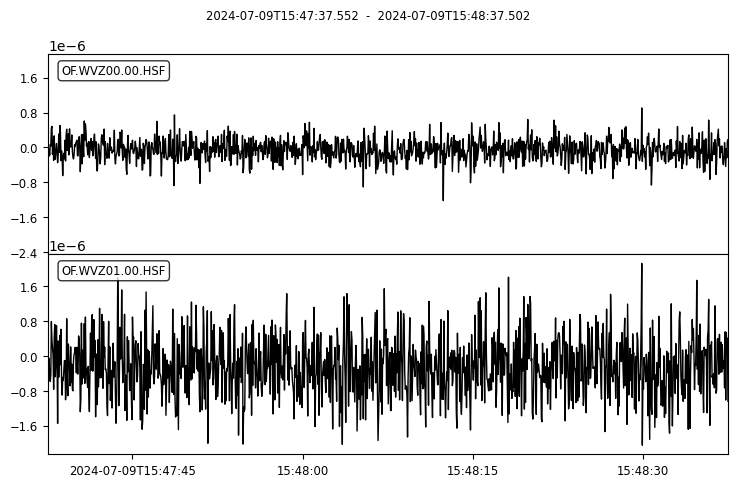

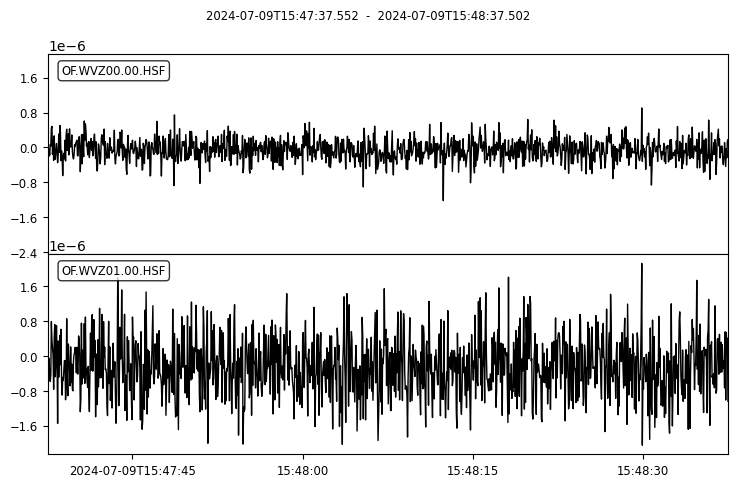

In [3]:
from pydas import h5toseed

inv,stream,binding = h5toseed('test/*.h5',
                              sensitivity = 1E7,
                              datakey='/Traces',
                              locationsperstation=1, 
                              stationdim=0,
                              nrlbackup=nrlbackup,
                              **attr)

stream.select(channel='HSF')[:2].plot()

# Output files

In [4]:

!ls -lh data.mseed metadata.stationxml 

-rw-r--r--  1 fred  staff   2.8M Aug 23 17:35 data.mseed
-rw-r--r--  1 fred  staff   755K Aug 23 17:35 metadata.stationxml
